In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download the codeSearchNetChallenge dataset 
_If needed_

In [2]:
%run downloading_cleaning_codeSearchNetChallenge_dataset.ipynb

CodeSearchNet challenge dataset ready to use!


## Exporting the codeSearchNetChallenge dataset to CSV files

_If needed_

In [3]:
%run preparing_csv_files_from_codeSearchNetChallenge_dataset.ipynb

Total lines of Python code in the dataset (after removing empty lines)
11206193


Total lines of Python code in the dataset's train folder (after removing empty lines)
10054266


Total lines of Python in the dataset's test folder (after removing empty lines)
541338


Total lines of Python in the dataset's valid folder
610589


Source: https://dev.fast.ai/tutorial.transformers

In [4]:
import torch
# torch.cuda.set_device(1)
print ('Current cuda device ', torch.cuda.current_device())

Current cuda device  0


In [5]:
from transformers import BertForMaskedLM, BertTokenizerFast

In [6]:
pretrained_weights = 'bert-base-cased'
tokenizer = BertTokenizerFast.from_pretrained(pretrained_weights)
model = BertForMaskedLM.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
ids = tokenizer.encode('This is an example of text, and')
ids

[101, 1188, 1110, 1126, 1859, 1104, 3087, 117, 1105, 102]

In [8]:
tokenizer.decode(ids)

'[CLS] This is an example of text, and [SEP]'

In [9]:
import torch
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

In [10]:
preds.shape,preds[0]

(torch.Size([1, 20]),
 tensor([ 101, 1188, 1110, 1126, 1859, 1104, 3087,  117, 1105,  102, 3446,  119,
          119,  119,  119,  117,  119,  119,  119,  119]))

In [11]:
tokenizer.decode(preds[0].numpy())

'[CLS] This is an example of text, and [SEP] Here....,....'

In [12]:
from fastai2.text.all import *

In [13]:
codeSearchNet_challenge_path = './CodeSearchNet_challenge_dataset'
all_csv_path = './CodeSearchNet_challenge_dataset/CodeSearchNet_challenge_dataset.csv'
train_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/train/train_CodeSearchNet_challenge_dataset.csv'
test_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/test/test_CodeSearchNet_challenge_dataset.csv'
valid_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/valid/valid_CodeSearchNet_challenge_dataset.csv'

In [14]:
df_train = pd.read_csv(train_csv_path)
df_valid = pd.read_csv(test_csv_path)
df_train.head()

,filename,text
0,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_11.py,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_8.py,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_1.py,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_13.py,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_5.py,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


In [15]:
df_train = df_train[["text"]]
df_valid = df_valid[["text"]]

display(df_train.head())
display(df_valid.head())

,text
0,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [16]:
all_texts = np.concatenate([df_train["text"].values, df_valid["text"].values])

In [17]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [18]:
splits = [list(range_of(df_train)), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [19]:
tls.train[0],tls.valid[0]

(tensor([19353,  1437,   168,  ...,  8702,  1403,   114]),
 tensor([19353,  1243,   168,  ...,   168,  4267,  5822]))

In [20]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([8333005]), torch.Size([6819279]))

In [21]:
show_at(tls.train, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
show_at(tls.valid, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
bs,sl = 16,512
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [24]:
dls.show_batch(max_n=5)

,text,text_
0,"def show _ clock _ output _ clock _ time _ timezone ( self, * * kwargs ) : "" "" "" Auto Generated Code "" "" "" config = ET. Element ( "" config "" ) show _ clock = ET. Element ( "" show _ clock "" ) config = show _ clock output = ET. SubElement ( show _ clock, "" output "" ) clock _ time = ET. SubElement ( output, "" clock - time "" ) timezone = ET. SubElement ( clock _ time, "" timezone "" ) timezone. text = kwargs. pop ('timezone') callback = kwargs. pop ('callback ', self. _ callback ) return callback ( config ) def get _ system _ uptime _ input _ rbridge _ id ( self, * * kwargs ) : "" "" "" Auto Generated Code "" "" "" config = ET. Element ( "" config ""","show _ clock _ output _ clock _ time _ timezone ( self, * * kwargs ) : "" "" "" Auto Generated Code "" "" "" config = ET. Element ( "" config "" ) show _ clock = ET. Element ( "" show _ clock "" ) config = show _ clock output = ET. SubElement ( show _ clock, "" output "" ) clock _ time = ET. SubElement ( output, "" clock - time "" ) timezone = ET. SubElement ( clock _ time, "" timezone "" ) timezone. text = kwargs. pop ('timezone') callback = kwargs. pop ('callback ', self. _ callback ) return callback ( config ) def get _ system _ uptime _ input _ rbridge _ id ( self, * * kwargs ) : "" "" "" Auto Generated Code "" "" "" config = ET. Element ( "" config "" )"
1,"] ) def get _ socket ( self ) : "" "" "" Create listener socket based on bottle server parameters. "" "" "" import eventlet # Separate out socket. listen arguments socket _ args = { } for arg in ('backlog ','family') : try : socket _ args [ arg ] = self. options. pop ( arg ) except KeyError : pass # Separate out wrap _ ssl arguments ssl _ args = { } for arg in ('keyfile ','certfile ','server _ side ','cert _ reqs ','ssl _ version ','ca _ certs ','do _ handshake _ on _ connect ','suppress _ ragged _ eofs ','ciphers') : try : ssl _ args [ arg ] = self. options. pop ( arg ) except KeyError : pass address = ( self. host, self. port ) try : sock = eventlet. listen ( address, * * socket _ args ) except TypeError",") def get _ socket ( self ) : "" "" "" Create listener socket based on bottle server parameters. "" "" "" import eventlet # Separate out socket. listen arguments socket _ args = { } for arg in ('backlog ','family') : try : socket _ args [ arg ] = self. options. pop ( arg ) except KeyError : pass # Separate out wrap _ ssl arguments ssl _ args = { } for arg in ('keyfile ','certfile ','server _ side ','cert _ reqs ','ssl _ version ','ca _ certs ','do _ handshake _ on _ connect ','suppress _ ragged _ eofs ','ciphers') : try : ssl _ args [ arg ] = self. options. pop ( arg ) except KeyError : pass address = ( self. host, self. port ) try : sock = eventlet. listen ( address, * * socket _ args ) except TypeError :"
2,": "" "" "" [UNK] [UNK] [UNK] "" "" "" # try : self. fenum. write ('\ n') self. fcpp = open ( os. path. join ( os. path. abspath ( self. ctp _ dir ),'ThostFtdcUserApiDataType. h'),'r') for idx, line in enumerate ( self. fcpp ) : l = self. process _ line ( idx, line ) self. f _ data _ type. write ( l ) self. fcpp. close ( ) self. f _ data _ type. close ( ) self. fenum. close ( ) print ('ctp _ data _ type. py 生 [UNK] [UNK] [UNK] [UNK] [UNK]') def run ( self ) : "" "" "" [UNK] [UNK] [UNK] "" "" "" fcpp = open ( os. path. join ( os. path. abspath ( self. ctp _ dir ),'ThostFtdcUserApiStruct. h'),'r') fpy = open ( os. path. join ( self. out _ path,'ctp _ struct. cs'),'w ', encoding ='utf",""" "" "" [UNK] [UNK] [UNK] "" "" "" # try : self. fenum. write ('\ n') self. fcpp = open ( os. path. join ( os. path. abspath ( self. ctp _ dir ),'ThostFtdcUserApiDataType. h'),'r') for idx, line in enumerate ( self. fcpp ) : l = self. process _ line ( idx, line ) self. f _ data _ type. write ( l ) self. fcpp. close ( ) self. f _ data _ type. close ( ) self. fenum. close ( ) print ('ctp _ data _ type. py 生 [UNK] [UNK] [UNK] [UNK] [UNK]') def run ( self ) : "" "" "" [UNK] [UNK] [UNK] "" "" "" fcpp = open ( os

In [25]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [26]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [27]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [28]:
dls.show_batch(max_n=5)

,text,text_
0,"def write _ map _ file ( mapFNH, items, header ) : "" "" "" Given a list of mapping items ( in the form described by the parse _ mapping _ file method ) and a header line, write each row to the given input file with fields separated by tabs. : type mapFNH : file or str : param mapFNH : Either the full path to the map file or an open file handle : type items : list : param item : The list of row entries to be written to the mapping file : type header : list or str : param header : The descriptive column names that are required as the first line of the mapping file : rtype : None "" "" "" if isinstance ( header, list ) : header = "" \ t "". join ( header ) + "" \","write _ map _ file ( mapFNH, items, header ) : "" "" "" Given a list of mapping items ( in the form described by the parse _ mapping _ file method ) and a header line, write each row to the given input file with fields separated by tabs. : type mapFNH : file or str : param mapFNH : Either the full path to the map file or an open file handle : type items : list : param item : The list of row entries to be written to the mapping file : type header : list or str : param header : The descriptive column names that are required as the first line of the mapping file : rtype : None "" "" "" if isinstance ( header, list ) : header = "" \ t "". join ( header ) + "" \ n"
1,"reverse _ translate [ '.'] if include _ stop and last _ codon not in stop _ codons : codon _ list. append ( stop _ codons [ 0 ] ) return codon _ list def sanitize _ codon _ list ( codon _ list, forbidden _ seqs = ( ) ) : "" "" "" Make silent mutations to the given codon lists to remove any undesirable sequences that are present within it. Undesirable sequences include restriction sites, which may be optionally specified as a second argument, and homopolymers above a pre - defined length. The return value is the number of corrections made to the codon list. "" "" "" # Unit test missing for : # Homopolymer fixing for codon in codon _ list : if len ( codon )! = 3 : raise ValueError ( "" Codons must have exactly 3 bases :'{ }'"". format (","_ translate [ '.'] if include _ stop and last _ codon not in stop _ codons : codon _ list. append ( stop _ codons [ 0 ] ) return codon _ list def sanitize _ codon _ list ( codon _ list, forbidden _ seqs = ( ) ) : "" "" "" Make silent mutations to the given codon lists to remove any undesirable sequences that are present within it. Undesirable sequences include restriction sites, which may be optionally specified as a second argument, and homopolymers above a pre - defined length. The return value is the number of corrections made to the codon list. "" "" "" # Unit test missing for : # Homopolymer fixing for codon in codon _ list : if len ( codon )! = 3 : raise ValueError ( "" Codons must have exactly 3 bases :'{ }'"". format ( codon"
2,"index is None : location = getattr ( path _ spec,'location ', None ) if location is None or not location. startswith ('/ vss') : return None store _ index = None try : store _ index = int ( location [ 4 : ], 10 ) - 1 except ( TypeError, ValueError ) : pass if store _ index is None or store _ index < 0 : return None return store _ index def _ GetMemberForOffset ( self, offset ) : "" "" "" Finds the member whose data includes the provided offset. Args : offset ( int ) : offset in the uncompressed data to find the containing member for. Returns : gzipfile. GzipMember : gzip file member or None if not available. Raises : ValueError : if the provided offset is outside of the bounds of the uncompressed data. "" "" "" if offset < 0","is None : location = getattr ( path _ spec,'location ', None ) if location is None or not location. startswith ('/ vss') : return None store _ index = None try : store _ index = int ( location [ 4 : ], 10 ) - 1 except ( TypeError, ValueError ) : pass if store _ index is None or store _ index < 0 : return None return store _ index def _ GetMemberForOffset ( self, offset ) : "" "" "" Finds the member whose da

In [29]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [30]:
learn = Learner(dls, model, 
                loss_func=CrossEntropyLossFlat(), 
                cbs=[DropOutput,TerminateOnNaNCallback()], 
                metrics=[Perplexity(),accuracy]
               ).to_fp16()

In [31]:
learn.validate()

(#3) [13.44275951385498,688836.6875,0.03746901452541351]

In [32]:
print(learn.model)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [33]:
print(learn.summary()) 

BertForMaskedLM (Input shape: ['16 x 512'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            16 x 512 x 768       22,268,928 True      
________________________________________________________________
Embedding            16 x 512 x 768       393,216    True      
________________________________________________________________
Embedding            16 x 512 x 768       1,536      True      
________________________________________________________________
LayerNorm            16 x 512 x 768       1,536      True      
________________________________________________________________
Dropout              16 x 512 x 768       0          False     
________________________________________________________________
Linear               16 x 512 x 768       590,592    True      
________________________________________________________________
Linear               16 x 512 x 768       590,592    True      
______________________________________________________

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=5.754399353463668e-06)

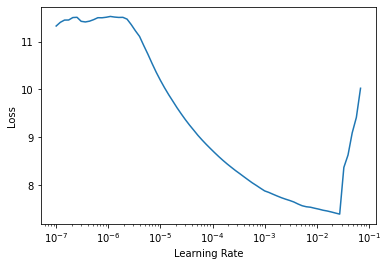

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,0.016708,0.005406,1.005420,0.999065,1:23:56


/opt/tljh/user/lib/python3.7/site-packages/fastai2/callback/schedule.py:68: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx = (pos >= pcts).nonzero().max()


In [36]:
df_valid.head(1)

,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [37]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"

In [38]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 20])

In [39]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)

In [40]:
tokenizer.decode(preds[0].cpu().numpy())
# tokenizer.decode(preds[0])

'[CLS] = Unicorn = A unicorn is a magical creature with a rainbow tail and a horn [SEP] = = = = = = = = = = = = = = = = = = = ='

In [41]:
preds

tensor([[  101,   134, 12118, 23941,   134,   138,  8362, 23941,  1110,   170,
          9214,  6093,  1114,   170, 21489,  5287,  1105,   170,  9621,   102,
           134,   134,   134,   134,   134,   134,   134,   134,   134,   134,
           134,   134,   134,   134,   134,   134,   134,   134,   134,   134]],
       device='cuda:0')

In [42]:
preds[0]

tensor([  101,   134, 12118, 23941,   134,   138,  8362, 23941,  1110,   170,
         9214,  6093,  1114,   170, 21489,  5287,  1105,   170,  9621,   102,
          134,   134,   134,   134,   134,   134,   134,   134,   134,   134,
          134,   134,   134,   134,   134,   134,   134,   134,   134,   134],
       device='cuda:0')

In [43]:
prompt = "import"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'[CLS] import [SEP] import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import'

In [44]:
prompt = "\n = import = \n \n import"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'[CLS] = import = import [SEP] = import = import import = import import = import import import import import import import import import import import import import import import import import import import import import import import import import'

In [45]:
# learn.save('fine_tuned')
learn.save('20200817_fit_head_bert_model')

In [46]:
learn.load('20200817_fit_head_bert_model');

In [47]:
learn.unfreeze()

In [48]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,0.012979,0.005226,1.005240,0.999091,1:24:08
1,0.013667,0.005298,1.005312,0.999102,1:24:17
2,0.014761,0.005193,1.005206,0.999108,1:24:21
3,0.014986,0.005010,1.005023,0.999125,1:24:31
4,0.017401,0.004751,1.004762,0.999166,1:24:47
5,0.016076,0.004615,1.004626,0.999179,1:24:51
6,0.014559,0.004412,1.004422,0.999205,1:24:45
7,0.010650,0.004264,1.004274,0.999221,1:24:52
8,0.014061,0.004177,1.004186,0.999235,1:24:46
9,0.014755,0.004155,1.004164,0.999238,1:24:47


In [49]:
print(learn.summary()) 

BertForMaskedLM (Input shape: ['16 x 512'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            16 x 512 x 768       22,268,928 True      
________________________________________________________________
Embedding            16 x 512 x 768       393,216    True      
________________________________________________________________
Embedding            16 x 512 x 768       1,536      True      
________________________________________________________________
LayerNorm            16 x 512 x 768       1,536      True      
________________________________________________________________
Dropout              16 x 512 x 768       0          False     
________________________________________________________________
Linear               16 x 512 x 768       590,592    True      
________________________________________________________________
Linear               16 x 512 x 768       590,592    True      
______________________________________________________

In [51]:
learn.save('20200817_fine_tuned_bert_model')

In [55]:
prompt = "def get_vid_from_url"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'[CLS] def get _ vid _ from _ url [SEP] # [SEP] # # # # # # # # # # # # # # # # # # # # # # # # # #'

In [56]:
prompt = "[CLS] [MASK]"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'[CLS] [CLS] [MASK] [SEP] and and [SEP] and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and, and'

In [60]:
prompt = "[CLS]"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'[CLS] [CLS] [SEP] [SEP] Campeonato [SEP] [SEP] # [SEP] # # [SEP] # # # # # # # # # # # # # # # # # # [SEP] # [SEP] [SEP] # [SEP] [SEP] [SEP] [SEP] [SEP]'

In [61]:
learn.load('20200817_fit_head_bert_model');
_model_bert_fit = learn.model
# save tokenizer and model
model_path= '20200817_fit_head_bert_model-CodeSearchNet'
!mkdir {model_path}
_model_bert_fit.save_pretrained(f"{str(model_path)}")
tokenizer.save_pretrained(f"{str(model_path)}")

mkdir: cannot create directory ‘20200817_fit_head_bert_model-CodeSearchNet’: File exists


('20200817_fit_head_bert_model-CodeSearchNet/vocab.txt',
 '20200817_fit_head_bert_model-CodeSearchNet/special_tokens_map.json',
 '20200817_fit_head_bert_model-CodeSearchNet/added_tokens.json')

In [63]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./20200817_fit_head_bert_model-CodeSearchNet",
    tokenizer="./20200817_fit_head_bert_model-CodeSearchNet"
)

fill_mask("def [MASK] (:")

[{'sequence': '[CLS] def ( ( : [SEP]',
  'score': 0.9995617270469666,
  'token': 113,
  'token_str': '('},
 {'sequence': '[CLS] def ) ( : [SEP]',
  'score': 5.696003790944815e-05,
  'token': 114,
  'token_str': ')'},
 {'sequence': '[CLS] def. ( : [SEP]',
  'score': 5.5757423979230225e-05,
  'token': 119,
  'token_str': '.'},
 {'sequence': '[CLS] def _ ( : [SEP]',
  'score': 3.494691918604076e-05,
  'token': 168,
  'token_str': '_'},
 {'sequence': '[CLS] def, ( : [SEP]',
  'score': 2.6676145353121683e-05,
  'token': 117,
  'token_str': ','}]

In [64]:
learn.load('20200817_fine_tuned_bert_model');
_model_bert_fit = learn.model
# save tokenizer and model
model_path= '20200817_fine_tuned_bert_model-CodeSearchNet'
!mkdir {model_path}
_model_bert_fit.save_pretrained(f"{str(model_path)}")
tokenizer.save_pretrained(f"{str(model_path)}")

('20200817_fine_tuned_bert_model-CodeSearchNet/vocab.txt',
 '20200817_fine_tuned_bert_model-CodeSearchNet/special_tokens_map.json',
 '20200817_fine_tuned_bert_model-CodeSearchNet/added_tokens.json')

In [65]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./20200817_fine_tuned_bert_model-CodeSearchNet",
    tokenizer="./20200817_fine_tuned_bert_model-CodeSearchNet"
)

fill_mask("def [MASK] (")

[{'sequence': '[CLS] def ( ( [SEP]',
  'score': 0.9934437274932861,
  'token': 113,
  'token_str': '('},
 {'sequence': '[CLS] def [CLS] ( [SEP]',
  'score': 0.0010817724978551269,
  'token': 101,
  'token_str': '[CLS]'},
 {'sequence': '[CLS] def, ( [SEP]',
  'score': 0.0007386057986877859,
  'token': 117,
  'token_str': ','},
 {'sequence': '[CLS] def where ( [SEP]',
  'score': 0.0005967014585621655,
  'token': 1187,
  'token_str': 'where'},
 {'sequence': '[CLS] def with ( [SEP]',
  'score': 0.00032101187389343977,
  'token': 1114,
  'token_str': 'with'}]

In [67]:
fill_mask("def get_vid_from_url(url):\n [MASK]")

[{'sequence': '[CLS] def get _ vid _ from _ url ( url ) : [SEP] [SEP]',
  'score': 0.9957885146141052,
  'token': 102,
  'token_str': '[SEP]'},
 {'sequence': '[CLS] def get _ vid _ from _ url ( url ) : [CLS] [SEP]',
  'score': 0.0012085170019418001,
  'token': 101,
  'token_str': '[CLS]'},
 {'sequence': '[CLS] def get _ vid _ from _ url ( url ) :. [SEP]',
  'score': 0.0007131644524633884,
  'token': 119,
  'token_str': '.'},
 {'sequence': '[CLS] def get _ vid _ from _ url ( url ) : def [SEP]',
  'score': 0.0007044895901344717,
  'token': 19353,
  'token_str': 'def'},
 {'sequence': '[CLS] def get _ vid _ from _ url ( url ) : ; [SEP]',
  'score': 0.00013354521070141345,
  'token': 132,
  'token_str': ';'}]

In [68]:
fill_mask("from pandas import [MASK]") 

[{'sequence': '[CLS] from pandas import [SEP] [SEP]',
  'score': 0.9969683289527893,
  'token': 102,
  'token_str': '[SEP]'},
 {'sequence': '[CLS] from pandas import [CLS] [SEP]',
  'score': 0.0010887219104915857,
  'token': 101,
  'token_str': '[CLS]'},
 {'sequence': '[CLS] from pandas import. [SEP]',
  'score': 0.0004200416151434183,
  'token': 119,
  'token_str': '.'},
 {'sequence': '[CLS] from pandas import ; [SEP]',
  'score': 0.00027348980074748397,
  'token': 132,
  'token_str': ';'},
 {'sequence': '[CLS] from pandas import def [SEP]',
  'score': 8.858884393703192e-05,
  'token': 19353,
  'token_str': 'def'}]

In [1]:
from transformers import pipeline

text_generation = pipeline(
    "text-generation",
    model="./20200817_fine_tuned_bert_model-CodeSearchNet",
    tokenizer="./20200817_fine_tuned_bert_model-CodeSearchNet"
)

text_generation("def [MASK] (")

/opt/tljh/user/lib/python3.7/site-packages/transformers/modeling_auto.py:798: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


NotImplementedError: Generation is currently not supported for BertForMaskedLM. Please select a model from ['XLNetLMHeadModel', 'TransfoXLLMHeadModel', 'ReformerModelWithLMHead', 'GPT2LMHeadModel', 'OpenAIGPTLMHeadModel', 'CTRLLMHeadModel', 'TFXLNetLMHeadModel', 'TFTransfoXLLMHeadModel', 'TFGPT2LMHeadModel', 'TFOpenAIGPTLMHeadModel', 'TFCTRLLMHeadModel'] for generation.